In [18]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import layers

In [3]:
dfa = pd.read_csv('NORMAL_A.csv', index_col = 'TIME')
dfb = pd.read_csv('NORMAL_B.csv', index_col = 'TIME')
dfc = pd.read_csv('NORMAL_C.csv', index_col = 'TIME')


In [4]:
dfa = dfa.iloc[0:2365,:]

In [6]:
dfb = dfb.iloc[0:2365,:]
dfc = dfc.iloc[0:2365,:]

In [8]:
dfc

,Ic,Vc
TIME,,
31-01-2024 00:00,21.102428,0.200859
31-01-2024 00:01,21.273066,0.196916
31-01-2024 00:02,21.408047,0.192910
31-01-2024 00:03,21.501503,0.188830
31-01-2024 00:04,21.341967,0.184184
...,...,...
01-02-2024 15:20,24.912239,0.457598
01-02-2024 15:21,25.515675,0.451407
01-02-2024 15:22,26.106554,0.445104


In [9]:
import matplotlib.pyplot as plt

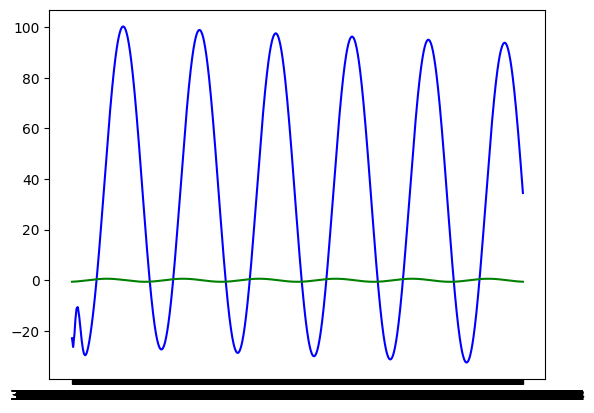

In [11]:
plt.plot(dfb['Ib'], color ='blue')
plt.plot(dfb['Vb'], color = 'green')

In [12]:
trainb = dfb[:round(len(dfb.Ib)*70/100)]
testb = dfb[round(len(dfb.Ib)*70/100):]

In [13]:
traina = dfa[:round(len(dfa.Ia)*70/100)]
testa = dfa[round(len(dfa.Ia)*70/100):]

In [14]:
trainc = dfc[:round(len(dfc.Ic)*70/100)]
testc = dfc[round(len(dfc.Ic)*70/100):]

In [15]:
def prepare_data(df, sequence_length=7):

    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)
    X, y = [], []

    for i in range(len(df) - sequence_length):
        X.append(df.iloc[i:i + sequence_length].values)
        y.append(df.iloc[i + sequence_length].values)


    X_train = np.array(X)
    y_train = np.array(y)

    return X_train, y_train

In [16]:
X_traina, y_traina = prepare_data(traina)
X_trainb, y_trainb = prepare_data(trainb)
X_trainc, y_trainc = prepare_data(trainc)

In [23]:
#FOR A
modelA = Sequential([
    layers.Input(shape=(X_traina.shape[1], X_traina.shape[2])),
    layers.LSTM(32, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(16),
    layers.Dense(y_traina.shape[-1])
])


modelA.compile(optimizer='rmsprop', loss='mse', metrics =['accuracy'])


modelA.fit(X_traina, y_traina, batch_size=10, epochs=10)

#FOR B
modelB = Sequential([
    layers.Input(shape=(X_trainb.shape[1], X_trainb.shape[2])),
    layers.LSTM(32, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(16),
    layers.Dense(y_trainb.shape[-1])
])


modelB.compile(optimizer='rmsprop', loss='mse', metrics =['accuracy'])


modelB.fit(X_trainb, y_trainb, batch_size=10, epochs=10)

#FOR C

modelC = Sequential([
    layers.Input(shape=(X_trainc.shape[1], X_trainc.shape[2])),
    layers.LSTM(32, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(16),
    layers.Dense(y_trainc.shape[-1])
])


modelC.compile(optimizer='rmsprop', loss='mse', metrics =['accuracy'])


modelC.fit(X_trainc, y_trainc, batch_size=10, epochs=10)

Epoch 1/10
165/165 [==============================] - 5s 9ms/step - loss: 891.7162 - accuracy: 0.9751
Epoch 2/10
165/165 [==============================] - 2s 9ms/step - loss: 735.3832 - accuracy: 0.9897
Epoch 3/10
165/165 [==============================] - 1s 7ms/step - loss: 640.6372 - accuracy: 0.9933
Epoch 4/10
165/165 [==============================] - 1s 7ms/step - loss: 564.2964 - accuracy: 0.9945
Epoch 5/10
165/165 [==============================] - 1s 6ms/step - loss: 494.8628 - accuracy: 0.9964
Epoch 6/10
165/165 [==============================] - 1s 7ms/step - loss: 431.5722 - accuracy: 0.9970
Epoch 7/10
165/165 [==============================] - 1s 7ms/step - loss: 373.5364 - accuracy: 0.9964
Epoch 8/10
165/165 [==============================] - 1s 7ms/step - loss: 321.2341 - accuracy: 0.9958
Epoch 9/10
165/165 [==============================] - 1s 7ms/step - loss: 273.4745 - accuracy: 0.9964
Epoch 10/10
165/165 [==============================] - 1s 7ms/step - loss: 230.279

In [20]:
modelA.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 32)             4480      
                                                                 
 dropout (Dropout)           (None, 7, 32)             0         
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 2)                 34        
                                                                 
Total params: 7650 (29.88 KB)
Trainable params: 7650 (29.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
X_testa,y_testa = prepare_data(testa)
X_testb,y_testb = prepare_data(testb)
X_testc,y_testc = prepare_data(testc)

In [25]:
modelA.evaluate(X_testa,y_testa)
modelB.evaluate(X_testb,y_testb)
modelC.evaluate(X_testc,y_testc)

22/22 [==============================] - 1s 3ms/step - loss: 454.8111 - accuracy: 0.9986


[454.8111267089844, 0.9985755085945129]

In [35]:
future_periods = 24
forecast_valuesa = []
last_sequence = X_traina[-1]

for _ in range(future_periods):

    next_prediction = modelA.predict(last_sequence.reshape(1, -1, X_traina.shape[2]))[0]
    last_sequence = np.concatenate((last_sequence[1:], next_prediction.reshape(1, X_traina.shape[2])))
    forecast_valuesa.append(next_prediction)

forecast_valuesa = np.array(forecast_valuesa)

last_timestamp = dfa.index[-1]

future_timestamps = pd.date_range(start=last_timestamp, periods=future_periods+1, freq='T')[1:]

forecast_dfa = pd.DataFrame(forecast_valuesa, index=future_timestamps, columns=dfa.columns)



1/1 [==============================] - 0s 21ms/step


In [38]:
forecast_dfa.to_csv('forecast_dfa.csv')

In [ ]:
future_periods = 24
forecast_valuesb = []
last_sequence = X_trainb[-1]

for _ in range(future_periods):

    next_prediction = modelB.predict(last_sequence.reshape(1, -1, X_trainb.shape[2]))[0]
    last_sequence = np.concatenate((last_sequence[1:], next_prediction.reshape(1, X_trainb.shape[2])))
    forecast_valuesb.append(next_prediction)

forecast_valuesb = np.array(forecast_valuesb)

last_timestamp = dfb.index[-1]

future_timestamps = pd.date_range(start=last_timestamp, periods=future_periods+1, freq='T')[1:]

forecast_dfb = pd.DataFrame(forecast_valuesb, index=future_timestamps, columns=dfb.columns)


In [40]:
forecast_dfb.to_csv('forecast_dfb.csv')

In [41]:
future_periods = 24
forecast_valuesc = []
last_sequence = X_trainc[-1]

for _ in range(future_periods):

    next_prediction = modelC.predict(last_sequence.reshape(1, -1, X_trainc.shape[2]))[0]
    last_sequence = np.concatenate((last_sequence[1:], next_prediction.reshape(1, X_trainc.shape[2])))
    forecast_valuesc.append(next_prediction)

forecast_valuesc = np.array(forecast_valuesc)

last_timestamp = dfc.index[-1]

future_timestamps = pd.date_range(start=last_timestamp, periods=future_periods+1, freq='T')[1:]

forecast_dfc = pd.DataFrame(forecast_valuesc, index=future_timestamps, columns=dfc.columns)

1/1 [==============================] - 0s 21ms/step


In [42]:
forecast_dfc.to_csv('forecast_dfc.csv')

In [59]:
FD = pd.read_csv('FaultyData.csv', index_col ='Date')

In [60]:
FD = FD.iloc[0:39,:]

In [ ]:
forecast_dfa

In [86]:
FD

,Ia,Va
Date,,
01-02-2024 15:25,23.823406,0.006976
01-02-2024 15:26,22.950219,-0.180863
01-02-2024 15:27,22.069686,-0.188270
01-02-2024 15:28,21.182016,-0.195682
01-02-2024 15:29,20.287429,-0.203074
01-02-2024 15:30,19.386152,-0.210407
01-02-2024 15:31,18.478417,-0.217651
01-02-2024 15:32,17.564451,-0.224797
01-02-2024 15:33,16.644476,-0.231857


In [81]:
lower_threshold_I = -120
upper_threshold_I = 225

lower_threshold_V = -1
upper_threshold_V = 1

thresholds = {
    'Ia': {'lower': lower_threshold_I, 'upper': upper_threshold_I},
    'Va': {'lower': lower_threshold_V, 'upper': upper_threshold_V}
}

alert_timestamps = []

for column in thresholds:
    lower_threshold = thresholds[column]['lower']
    upper_threshold = thresholds[column]['upper']

    exceed_lower_threshold = FD[column] < lower_threshold
    exceed_upper_threshold = FD[column] > upper_threshold

    alert_indices = FD[exceed_lower_threshold | exceed_upper_threshold].index

    alert_timestamps.extend(alert_indices)
alert_timestamps = sorted(set(alert_timestamps))
print("Alert Timestamps:", alert_timestamps)

Alert Timestamps: ['01-02-2024 16:01', '01-02-2024 16:02', '01-02-2024 16:03']


In [89]:
FD.index = pd.to_datetime(FD.index)

In [94]:
last_normal_timestamp = FD.index[(FD['Ia'].abs() <= 500)].max()

first_outlier_timestamp = FD.index[(FD['Ia'].abs() > 600)].min()

time_difference = (first_outlier_timestamp - last_normal_timestamp).total_seconds()

print("Time difference between last normal value and first outlier:", time_difference, "seconds")

electricity_fluct =  0.002
distance = time_difference * electricity_fluct

print("Distance from main power line tower to the fault:", distance, "kms")

distance_scientific = "{:.2e}".format(distance)

Time difference between last normal value and first outlier: 120.0 seconds
Distance from main power line tower to the fault: 0.24 kms


In [96]:
distance_AB = 0.2
distance_AC = 1.0

distance_fault_A = distance

closest_node = 'B' if distance_fault_A < distance_AB else 'C' if distance_fault_A < distance_AC else 'Unknown'

print("The fault is closest to node:", closest_node)

The fault is closest to node: C
